[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


(-1.0, 1.0)

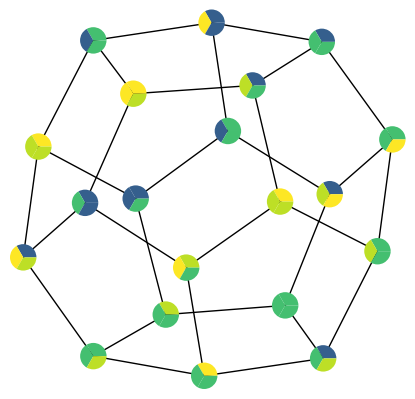

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# parameters for pie plot
radius = 0.0715
cmap = plt.cm.viridis

# make graph
G = nx.Graph()
G = nx.dodecahedral_graph()
print(G.nodes())
pos = nx.spring_layout(G)

colours = 3
# storing attributes in a dict
attrs = {
    1:[1,1,1],
    2:[1, 2, 3],
    3:[1, 2, 3],
    4:[1, 2,3],
}
attrs = {}
for i in G.nodes():
  attrs[i] = [random.choice([111.1,0.3,0.7,0.9]) for _ in range(colours)]

# normalising data to make colors
a = np.array(list(attrs.values()))
maxes = np.max(a, axis=0) # note that this will throw an error if different nodes have different number of features.


# collect colors in dictionary
colors= {}

for key, val in attrs.items():
    colors[key] = list(np.array(val))

# draw graph and draw pieplots instead of nodes

nx.draw_networkx_edges(G, pos=pos)
for node in G.nodes:

    attributes = attrs[node]

    a = plt.pie(
        [1]*len(attributes), # s.t. all wedges have equal size
        center=pos[node],
        colors = [cmap(b) for b in colors[node]],
        radius=radius)

plt.ylim(-1,1)
plt.xlim(-1,1)

In [ ]:
solution = r'''(0 --> {1, 2, 3, 4, 5}, 1 --> {6, 7, 8, 9, 10}, 2 --> {1, 2, 3, 11, 12}, 3 --> {4, 5, 6, 7, 8},
                 4 --> {1, 2, 3, 9, 10}, 5 --> {4, 6, 7, 11, 12}, 6 --> {5, 8, 9, 10, 13}, 7 --> {1, 2, 3, 6, 7},
                 8 --> {4, 5, 11, 12, 13}, 9 --> {1, 2, 3, 8, 9}, 10 --> {6, 7, 10, 11, 12}, 11 --> {4, 5, 8, 9, 13},
                 12 --> {1, 2, 3, 11, 12}, 13 --> {4, 5, 6, 7, 13}, 14 --> {8, 9, 10, 11, 12}, 15 --> {1, 2, 3, 5, 13},
                 16 --> {4, 6, 7, 9, 10}, 17 --> {5, 8, 11, 12, 13}, 18 --> {1, 2, 3, 6, 7}, 19 --> {9, 10, 11, 12, 13})'''

In [ ]:
s =solution.split("},")
print(s)

['(0 --> {1, 2, 3, 4, 5', ' 1 --> {6, 7, 8, 9, 10', ' 2 --> {1, 2, 3, 11, 12', ' 3 --> {4, 5, 6, 7, 8', '\n                 4 --> {1, 2, 3, 9, 10', ' 5 --> {4, 6, 7, 11, 12', ' 6 --> {5, 8, 9, 10, 13', ' 7 --> {1, 2, 3, 6, 7', '\n                 8 --> {4, 5, 11, 12, 13', ' 9 --> {1, 2, 3, 8, 9', ' 10 --> {6, 7, 10, 11, 12', ' 11 --> {4, 5, 8, 9, 13', '\n                 12 --> {1, 2, 3, 11, 12', ' 13 --> {4, 5, 6, 7, 13', ' 14 --> {8, 9, 10, 11, 12', ' 15 --> {1, 2, 3, 5, 13', '\n                 16 --> {4, 6, 7, 9, 10', ' 17 --> {5, 8, 11, 12, 13', ' 18 --> {1, 2, 3, 6, 7', ' 19 --> {9, 10, 11, 12, 13})']


In [ ]:
s2 = {}
for substring in s:
  pair = substring.replace("(","").replace("{","").replace("}","").replace(")","").replace("\n","").split("-->")
  colours = pair[1].split(",")
  s2[int(pair[0])] = [int(c) for c in colours]

print(s2)


{0: [1, 2, 3, 4, 5], 1: [6, 7, 8, 9, 10], 2: [1, 2, 3, 11, 12], 3: [4, 5, 6, 7, 8], 4: [1, 2, 3, 9, 10], 5: [4, 6, 7, 11, 12], 6: [5, 8, 9, 10, 13], 7: [1, 2, 3, 6, 7], 8: [4, 5, 11, 12, 13], 9: [1, 2, 3, 8, 9], 10: [6, 7, 10, 11, 12], 11: [4, 5, 8, 9, 13], 12: [1, 2, 3, 11, 12], 13: [4, 5, 6, 7, 13], 14: [8, 9, 10, 11, 12], 15: [1, 2, 3, 5, 13], 16: [4, 6, 7, 9, 10], 17: [5, 8, 11, 12, 13], 18: [1, 2, 3, 6, 7], 19: [9, 10, 11, 12, 13]}


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


(-1.0, 1.0)

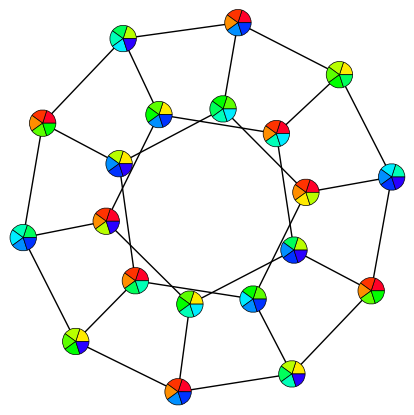

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
# parameters for pie plot
radius = 0.0715
cmap = plt.cm.viridis

# make graph
G = nx.Graph()
G = nx.dodecahedral_graph()
print(G.nodes())
pos = nx.spring_layout(G)

n_colours = 15
# storing attributes in a dict

attrs = s2

def generate_color_palette(n):
    cmap = plt.get_cmap('gist_rainbow')  # You can change this to any other continuous colormap
    colors = [cmap(i/n) for i in range(n)]
    return colors

# Create a color palette for the unique integers
color_palette = generate_color_palette(n_colours)



# Map your integer sequence to the colors
mapped_colors = []
for nodecolours in s2:
  colours_in_node = []
  for c in s2[nodecolours]:
    colours_in_node.append(color_palette[c-1])
  mapped_colors.append(colours_in_node)

# collect colors in dictionary

# draw graph and draw pieplots instead of nodes
nx.draw_networkx_edges(G, pos=pos)
for node in G.nodes:

    attributes = attrs[node]

    a = plt.pie(
        [1]*len(attributes), # s.t. all wedges have equal size
        center=pos[node],
        colors = mapped_colors[node],
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'antialiased': True},
        radius=radius)

plt.ylim(-1,1)
plt.xlim(-1,1)

In [ ]:
import numpy as np

def generate_positions(d1, d2):
    positions = {}
    angles = np.linspace(0, 2 * np.pi, 10, endpoint=False)  # Generate 10 angles evenly spaced around the circle

    # Place 10 nodes at distance d1
    for i, angle in enumerate(angles):
        x = d1 * np.cos(angle)
        y = d1 * np.sin(angle)
        positions[i] = (x, y)

    # Place another 10 nodes at distance d2, using the same angles
    for i, angle in enumerate(angles):
        x = d2 * np.cos(angle)
        y = d2 * np.sin(angle)
        positions[i + 10] = (x, y)  # Offset the node indices by 10

    return positions

def assign_custom_names(positions, outer_nodes, inner_nodes):
    new_positions = {}

    # First handle the outer circle nodes
    for new_node, old_node in zip(outer_nodes, range(10, 20)):
        new_positions[new_node] = positions[old_node]

    # Now handle the inner circle nodes
    for new_node, old_node in zip(inner_nodes, range(10)):
        new_positions[new_node] = positions[old_node]

    return new_positions



In [ ]:
# Specify the distances
d1 = 0.6
d2 = 0.99

# Generate initial positions
positions = generate_positions(d1, d2)

# Define the custom node orders
outer_nodes = [0, 10, 9, 13, 14, 15, 5, 4, 3, 19]
inner_nodes = [1, 11, 8, 12, 7, 16, 6, 17, 2, 18]

# Assign custom names to the positions
custom_positions = assign_custom_names(positions, outer_nodes, inner_nodes)

# Print the customized positions
print(custom_positions)

{0: (0.99, 0.0), 10: (0.800926824431198, 0.5819073997695484), 9: (0.30592682443119795, 0.941545951132202), 13: (-0.30592682443119784, 0.9415459511322021), 14: (-0.8009268244311979, 0.5819073997695485), 15: (-0.99, 1.2124003311558797e-16), 5: (-0.8009268244311981, -0.5819073997695483), 4: (-0.30592682443119806, -0.941545951132202), 3: (0.30592682443119773, -0.9415459511322021), 19: (0.8009268244311979, -0.5819073997695486), 1: (0.6, 0.0), 11: (0.4854101966249684, 0.3526711513754839), 8: (0.18541019662496847, 0.570633909777092), 12: (-0.1854101966249684, 0.5706339097770922), 7: (-0.48541019662496837, 0.35267115137548394), 16: (-0.6, 7.347880794884119e-17), 6: (-0.48541019662496854, -0.3526711513754838), 17: (-0.18541019662496852, -0.570633909777092), 2: (0.18541019662496833, -0.5706339097770922), 18: (0.48541019662496837, -0.352671151375484)}


(-1.0, 1.0)

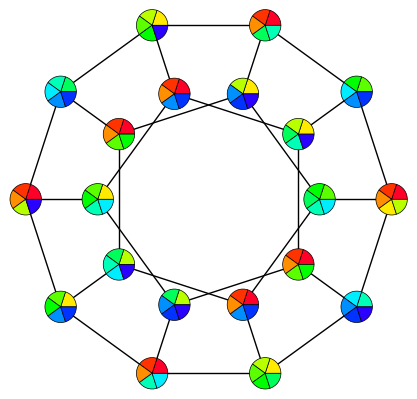

In [ ]:
radius = 0.085
cmap = plt.cm.viridis
nx.draw_networkx_edges(G, pos=custom_positions)
for node in G.nodes:

    attributes = attrs[node]

    a = plt.pie(
        [1]*len(attributes), # s.t. all wedges have equal size
        center=custom_positions[node],
        colors = mapped_colors[node],
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'antialiased': True},
        radius=radius)

plt.ylim(-1,1)
plt.xlim(-1,1)

{0: (2.0, 0.0), 10: (1.618033988749895, 1.1755705045849463), 9: (0.6180339887498949, 1.902113032590307), 13: (-0.6180339887498947, 1.9021130325903073), 14: (-1.6180339887498947, 1.1755705045849465), 15: (-2.0, 2.4492935982947064e-16), 5: (-1.6180339887498951, -1.175570504584946), 4: (-0.6180339887498951, -1.902113032590307), 3: (0.6180339887498945, -1.9021130325903073), 19: (1.6180339887498947, -1.1755705045849467), 1: (1.0, 0.0), 11: (0.8090169943749475, 0.5877852522924731), 8: (0.30901699437494745, 0.9510565162951535), 12: (-0.30901699437494734, 0.9510565162951536), 7: (-0.8090169943749473, 0.5877852522924732), 16: (-1.0, 1.2246467991473532e-16), 6: (-0.8090169943749476, -0.587785252292473), 17: (-0.30901699437494756, -0.9510565162951535), 2: (0.30901699437494723, -0.9510565162951536), 18: (0.8090169943749473, -0.5877852522924734)}


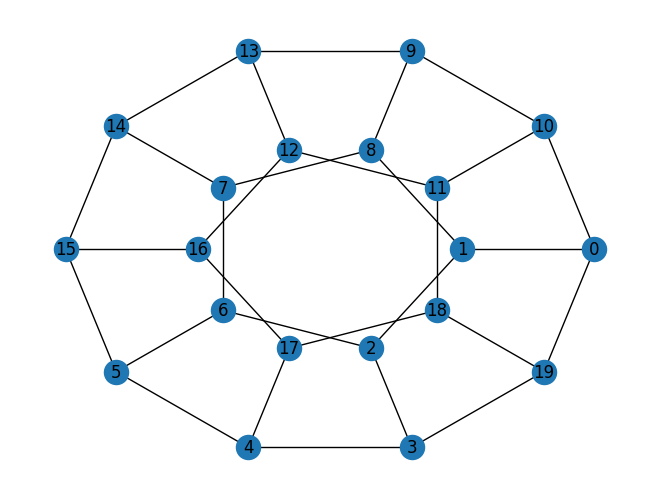

In [ ]:
nx.draw(G, pos=custom_positions,with_labels = True)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.colors import LinearSegmentedColormap, ListedColormap


# make graph
def plot_solution(G):
  pos = nx.spring_layout(G)

  n_colours = 15
  # storing attributes in a dict

  attrs = s2

  def generate_color_palette(n):
      cmap = plt.get_cmap('gist_rainbow')  # You can change this to any other continuous colormap
      colors = [cmap(i/n) for i in range(n)]
      return colors

  # Create a color palette for the unique integers
  color_palette = generate_color_palette(n_colours)



  # Map your integer sequence to the colors
  mapped_colors = []
  for nodecolours in s2:
    colours_in_node = []
    for c in s2[nodecolours]:
      colours_in_node.append(color_palette[c-1])
    mapped_colors.append(colours_in_node)

  # parameters for pie plot
  radius = 0.0715
  cmap = plt.cm.viridis

  # draw graph and draw pieplots instead of nodes
  nx.draw_networkx_edges(G, pos=pos)
  for node in G.nodes:

      attributes = attrs[node]

      a = plt.pie(
          [1]*len(attributes), # s.t. all wedges have equal size
          center=pos[node],
          colors = mapped_colors[node],
          radius=radius)

  plt.ylim(-1,1)
  plt.xlim(-1,1)